In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [68]:
frame = pd.read_csv('for_data_science_newline_fixed.csv')

In [69]:
frame.head(10)

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
0,Aburria-aburri-257423.wav,24.63350,2.3614,3.3205,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,02:13:53
1,Aburria-aburri-257423.wav,24.63350,6.7320,2.0103,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,02:13:53
2,Aburria-aburri-257423.wav,24.63350,19.2438,3.4505,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,02:13:53
3,Aburria-aburri-387212.wav,84.48000,0.6011,3.0800,24000,0,44100,Aburria aburri Wattled Guan,184.388,alarce,11/22/2021,03:28:01
4,Aburria-aburri-387212.wav,84.48000,77.6811,3.1400,24000,0,44100,Aburria aburri Wattled Guan,184.385,alarce,11/22/2021,03:28:01
5,Aburria-aburri-387212.wav,84.48000,30.4411,3.2000,24000,0,44100,Aburria aburri Wattled Guan,184.389,alarce,11/22/2021,03:28:01
6,Accipiter-bicolor-451839.wav,5.66857,0.3605,0.4399,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.847,alarce,11/22/2021,02:11:43
7,Accipiter-bicolor-451839.wav,5.66857,0.9982,0.2215,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.849,alarce,11/22/2021,02:11:43
8,Accipiter-bicolor-451839.wav,5.66857,0.8004,0.1949,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.848,alarce,11/22/2021,02:11:43
9,Accipiter-bicolor-451839.wav,5.66857,1.2049,0.3690,24000,0,44100,Accipiter bicolor Bicolored Hawk,921.850,alarce,11/22/2021,02:11:43


In [70]:
frame['MAX FREQ'].value_counts()
frame['SAMPLE RATE'].value_counts()
# ValueError: wav file with wrong frequency 48000: data\PYRE\Mixed_Bird-20220126T212121Z-003\Mixed_Bird\Agamia-agami-75996.wav

44100    19575
48000     9272
32000     1930
22050      557
16000       31
Name: SAMPLE RATE, dtype: int64

In [71]:
FILES = frame.loc[:, frame.columns[:7]][frame['SAMPLE RATE'] == 44100]
FILES

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100
...,...,...,...,...,...,...,...
31343,Zonotrichia-capensis-47546.wav,54.9355,15.7377,2.1003,24000,0,44100
31344,Zonotrichia-capensis-47546.wav,54.9355,28.6590,2.0703,24000,0,44100
31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100
31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100


In [72]:
my_file = open(r"C:\Users\lianl\Repositories\Q1-Project-Code\data\PYRE\birdwavs.txt", "r")
content = my_file.read()
content_list = content.split("\n")
my_file.close()
# print(content_list)

In [73]:
content_list

['Accipiter-superciliosus-329800.wav',
 'Accipiter-superciliosus-427037.wav',
 'Actitis-macularius-448472.wav',
 'Agelasticus-xanthophthalmus-20921.wav',
 'Akletos-melanoceps-270814.wav',
 'Akletos-melanoceps-27856.wav',
 'Alopochelidon-fucata-151133.wav',
 'Anairetes-flavirostris-463202.wav',
 'Anairetes-parulus-89119.wav',
 'Ara-severus-97087.wav',
 'Aratinga-weddellii-467530.wav',
 'Arundinicola-leucocephala-414335.wav',
 'Attila-bolivianus-296583.wav',
 'Attila-cinnamomeus-206109.wav',
 'Attila-cinnamomeus-27772.wav',
 'Attila-cinnamomeus-427101.wav',
 'Attila-spadiceus-27760.wav',
 'Attila-spadiceus-296570.wav',
 'Basileuterus-tristriatus-296994.wav',
 'Basileuterus-tristriatus-296995.wav',
 'Brotogeris-cyanoptera-270616.wav',
 'Bucco-tamatia-428544.wav',
 'Busarellus-nigricollis-260345.wav',
 'Buteo-albonotatus-38891.wav',
 'Buteogallus-meridionalis-373734.wav',
 'Butorides-striata-393274.wav',
 'Cacicus-haemorrhous-114258.wav',
 'Cacicus-oseryi-11894.wav',
 'Calliphlox-amethysti

In [74]:
boolean_series = FILES["IN FILE"].isin(content_list)
filtered_df = FILES[boolean_series]

In [75]:
filtered_df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE
65,Accipiter-superciliosus-329800.wav,61.88410,0.8311,3.1903,24000,0,44100
66,Accipiter-superciliosus-329800.wav,61.88410,4.0614,0.8200,24000,0,44100
67,Accipiter-superciliosus-329800.wav,61.88410,11.6919,2.4001,24000,0,44100
68,Accipiter-superciliosus-329800.wav,61.88410,9.4617,1.9401,24000,0,44100
69,Accipiter-superciliosus-329800.wav,61.88410,5.3914,3.1703,24000,0,44100
...,...,...,...,...,...,...,...
30910,Xiphorhynchus-obsoletus-437341.wav,6.11265,0.7421,2.4515,24000,0,44100
31316,Zimmerius-gracilipes-258668.wav,12.19920,9.7982,0.7624,24000,0,44100
31317,Zimmerius-gracilipes-258668.wav,12.19920,1.7416,0.8069,24000,0,44100
31318,Zimmerius-gracilipes-258668.wav,12.19920,3.2665,0.9086,24000,0,44100


In [76]:
filtered_df['IN FILE'].unique().size == len(content_list)

True

In [77]:
def wav_duration_statistics(df):
    """
    Function that calculates basic statistics related to the duration of
    annotations of a Pandas Dataframe compatible with PyHa.
    Args:
        df (Pandas Dataframe)
            - Automated labels or manual labels.
    Returns:
        Pandas Dataframe containing count, mean, mode, standard deviation, and
        IQR values based on annotation duration.
    """
    # Reading in the Duration column of the passed in dataframe as a Python
    # list
    annotation_lengths = df["DURATION"].to_list()
    # converting to numpy array which has more readily available statistics
    # functions
    annotation_lengths = np.asarray(annotation_lengths)
    # Converting the Python list to a numpy array
    entry = {'COUNT': np.shape(annotation_lengths)[0],
             'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],
             'MEAN': np.mean(annotation_lengths),
             'STANDARD DEVIATION': np.std(annotation_lengths),
             'MIN': np.amin(annotation_lengths),
             'Q1': np.percentile(annotation_lengths, 25),
             'MEDIAN': np.median(annotation_lengths),
             'Q3': np.percentile(annotation_lengths, 75),
             'MAX': np.amax(annotation_lengths)}
    # returning the dictionary as a pandas dataframe
    return pd.DataFrame.from_dict([entry])

In [78]:
def wav_cliplength_statistics(df):
    """
    Function that calculates basic statistics related to the duration of
    annotations of a Pandas Dataframe compatible with PyHa.
    Args:
        df (Pandas Dataframe)
            - Automated labels or manual labels.
    Returns:
        Pandas Dataframe containing count, mean, mode, standard deviation, and
        IQR values based on annotation duration.
    """
    # Reading in the Duration column of the passed in dataframe as a Python
    # list
    annotation_lengths = df["CLIP LENGTH"].to_list()
    # converting to numpy array which has more readily available statistics
    # functions
    annotation_lengths = np.asarray(annotation_lengths)
    # Converting the Python list to a numpy array
    entry = {'COUNT': np.shape(annotation_lengths)[0],
             'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],
             'MEAN': np.mean(annotation_lengths),
             'STANDARD DEVIATION': np.std(annotation_lengths),
             'MIN': np.amin(annotation_lengths),
             'Q1': np.percentile(annotation_lengths, 25),
             'MEDIAN': np.median(annotation_lengths),
             'Q3': np.percentile(annotation_lengths, 75),
             'MAX': np.amax(annotation_lengths)}
    # returning the dictionary as a pandas dataframe
    return pd.DataFrame.from_dict([entry])

In [79]:
wav_duration_statistics(filtered_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,3593,0.51,1.233978,1.682769,0.02,0.4601,0.75,1.3499,28.7349


In [80]:
wav_cliplength_statistics(filtered_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,3593,52.58,54.710925,46.671501,2.11592,26.7233,43.0498,66.0637,271.177


In [6]:
# Alopochelidon-fucata-151133.wav
# librosa.util.exceptions.ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(762624, 2)

In [7]:
# frame['MANUAL ID']

In [8]:
# wav_file = file.path() r"C:\Users\lianl\Repositories\annotation_train001.csv"

In [9]:
frame[frame['IN FILE'] == 'Alopochelidon-fucata-151133.wav']

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
540,Alopochelidon-fucata-151133.wav,17.2931,1.8744,0.5854,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
541,Alopochelidon-fucata-151133.wav,17.2931,0.3523,0.7835,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
542,Alopochelidon-fucata-151133.wav,17.2931,4.7296,0.4233,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
543,Alopochelidon-fucata-151133.wav,17.2931,3.5226,0.4954,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
544,Alopochelidon-fucata-151133.wav,17.2931,5.5402,0.6755,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
545,Alopochelidon-fucata-151133.wav,17.2931,2.6400,0.4413,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
546,Alopochelidon-fucata-151133.wav,17.2931,7.9270,0.4683,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
547,Alopochelidon-fucata-151133.wav,17.2931,9.2960,1.8914,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.11,alarce,11/22/2021,05:28:33
548,Alopochelidon-fucata-151133.wav,17.2931,11.4937,0.7655,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.12,alarce,11/22/2021,05:28:33
549,Alopochelidon-fucata-151133.wav,17.2931,12.6285,0.4053,24000,0,44100,Alopochelidon fucata Tawny-headed Swallow,7399.12,alarce,11/22/2021,05:28:33


In [11]:
frame[frame['IN FILE'] == 'Alopochelidon-fucata-151133.wav'].shape

(15, 12)

In [3]:
len(frame)

31365

In [4]:
frame.columns

Index(['IN FILE', 'CLIP LENGTH', 'OFFSET', 'DURATION', 'MAX FREQ', 'MIN FREQ',
       'SAMPLE RATE', 'MANUAL ID', 'TIME_SPENT', 'LAST MOD BY',
       'LAST MOD DATE', 'LAST MOD TIME'],
      dtype='object')

In [5]:
frame.info

<bound method DataFrame.info of                                IN FILE  CLIP LENGTH   OFFSET  DURATION  \
0            Aburria-aburri-257423.wav      24.6335   2.3614    3.3205   
1            Aburria-aburri-257423.wav      24.6335   6.7320    2.0103   
2            Aburria-aburri-257423.wav      24.6335  19.2438    3.4505   
3            Aburria-aburri-387212.wav      84.4800   0.6011    3.0800   
4            Aburria-aburri-387212.wav      84.4800  77.6811    3.1400   
...                                ...          ...      ...       ...   
31360  Zonotrichia-capensis-232609.wav      98.8560  63.2772    1.8301   
31361  Zonotrichia-capensis-232609.wav      98.8560  34.1554    2.4702   
31362  Zonotrichia-capensis-377483.wav      18.2596   0.5762    3.2199   
31363  Zonotrichia-capensis-377483.wav      18.2596   6.8160    2.1500   
31364  Zonotrichia-capensis-377483.wav      18.2596  12.9559    2.3599   

       MAX FREQ  MIN FREQ  SAMPLE RATE  \
0         24000         0        4410

array([[<AxesSubplot:title={'center':'CLIP LENGTH'}>]], dtype=object)

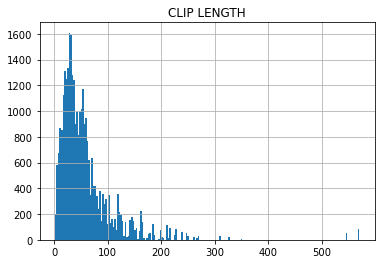

In [8]:
frame.hist(column = 'CLIP LENGTH',bins = 200)

array([[<AxesSubplot:title={'center':'DURATION'}>]], dtype=object)

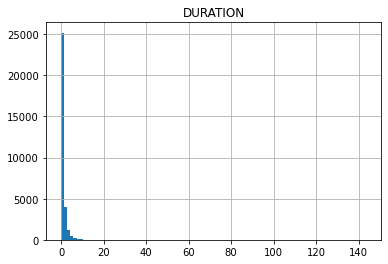

In [7]:
frame.hist(column = 'DURATION', bins = 100) #r-skewed

In [12]:
def annotation_duration_statistics(df):
    """
    Function that calculates basic statistics related to the duration of
    annotations of a Pandas Dataframe compatible with PyHa.
    Args:
        df (Pandas Dataframe)
            - Automated labels or manual labels.
    Returns:
        Pandas Dataframe containing count, mean, mode, standard deviation, and
        IQR values based on annotation duration.
    """
    # Reading in the Duration column of the passed in dataframe as a Python
    # list
    annotation_lengths = df["CLIP LENGTH"].to_list()
    # converting to numpy array which has more readily available statistics
    # functions
    annotation_lengths = np.asarray(annotation_lengths)
    # Converting the Python list to a numpy array
    entry = {'COUNT': np.shape(annotation_lengths)[0],
             'MODE': stats.mode(np.round(annotation_lengths, 2))[0][0],
             'MEAN': np.mean(annotation_lengths),
             'STANDARD DEVIATION': np.std(annotation_lengths),
             'MIN': np.amin(annotation_lengths),
             'Q1': np.percentile(annotation_lengths, 25),
             'MEDIAN': np.median(annotation_lengths),
             'Q3': np.percentile(annotation_lengths, 75),
             'MAX': np.amax(annotation_lengths)}
    # returning the dictionary as a pandas dataframe
    return pd.DataFrame.from_dict([entry])

In [13]:
annotation_duration_statistics(frame)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,31365,54.52,58.654714,56.929711,1.56735,26.462,43.8596,70.3216,569.652


In [ ]:
# mean, q3, median, mode

In [ ]:
# we only need the first, second and third

# we need the offset, and duration
# Species ID, not really since it will just be the file name.
# Sampling rate?

# configured Sampling Rate in features-params.json is 44100, there are other Sampling Rates in the Annotations. Such as 32000
    # "SR":44100,
    # "n_mels":72,
    # "FRAME_SIZE":2048,
    # "HOP_LENGTH":1024,

# switch the offset and the duration positions in the dataframe